In [36]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from scipy import interpolate
import seaborn as sns
from utils import *
import torch
import json

In [6]:
with open("./epoch5_dists.json", "r") as f:
    dists = json.load(f)

In [ ]:
(1358, 1178)
[[-1.3858929872512817,

In [121]:
1358
int(0.5 * (-1.0 + 1) * 1358)

0

In [122]:
def get_image_size(impath):
    to_tens = transforms.ToTensor()
    im = Image.open(impath).convert("RGB")
    enhancer = ImageEnhance.Brightness(im)
    factor = 4 #gives original image
    im = enhancer.enhance(factor)
    shape = im.size
    im = to_tens(im)
    return im, shape

def denormalize(dims, coords):

    """
    Convert coordinates in the range [-1, 1] to
    coordinates in the range [0, T] where `T` is
    the size of the image.
    """

    W, H = dims
    x, y = coords

    W = int(0.5 * (x + 1) * W)
    H = int(0.5 * (y + 1) * H)

    return torch.tensor([[W, H]], dtype = torch.long)


def plot_attention(image_names, muni_ids, epoch, index, save = False):
    
    dist_path = "./epoch" + str(epoch) + "_dists.json"
    with open(dist_path, "r") as f:
        dists = json.load(f)
        
    image_path = [i for i in image_names if muni_ids[index].split("_")[0] in i][0]
    
    muni_id = image_path.split("/")[5]
    im, im_size = get_image_size(image_path)
    mask = np.zeros(im_size)
    coords = dists[muni_id + "_" + str(epoch)]
    x, y = [], []

    for coord in coords:
        point = denormalize(im_size, coord).numpy()[0]
        mask[point[0], point[1]] += 1
        x.append(point[0])
        y.append(point[1])
        
    heatmap, xedges, yedges = np.histogram2d(x, y, bins = 25)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    test = torch.nn.functional.interpolate(torch.tensor(heatmap).unsqueeze(0).unsqueeze(0), size = (im_size[1], im_size[0]), mode = 'nearest')
    
    colormap = 'plasma'
    
    fig = plt.figure(figsize = (10,10))

    ax2 = plt.subplot(1, 2, 2, aspect = 'equal', frameon = False)
    ax2.imshow(im.permute(1,2,0), alpha = 1)#, cmap = 'plasma')
    hm = ax2.imshow(test[0].permute(1,2,0), alpha = 0.5, cmap = 'plasma')
    plt.axis('off')
    
    ax1 = plt.subplot(1, 2, 1, aspect = 'equal')
    ax1.imshow(im.permute(1,2,0), alpha = 1)
    plt.axis('off')

    if save:
    
        plt.savefig("./figs5/" + str(i) + ".png")
        plt.clf()    

In [298]:
def plot_attention(image_names, muni_ids, epoch, index, save = False):
    
    dist_path = "./epoch" + str(epoch) + "_dists.json"
    with open(dist_path, "r") as f:
        dists = json.load(f)
        
    image_path = [i for i in image_names if muni_ids[index].split("_")[0] in i][0]
    
    muni_id = image_path.split("/")[5]
    im, im_size = get_image_size(image_path)
    mask = np.zeros(im_size)
    coords = dists[muni_id + "_" + str(epoch)]
    x, y = [], []
    
    for coord in coords:
        coord = torch.clamp(torch.tensor(coord), -1, 1).numpy()
        point = denormalize(im_size, coord).numpy()[0]
        mask[point[0], point[1]] += 1
        x.append(point[0])
        y.append(point[1])

    fig = plt.figure(figsize = (10,10))
    plt.imshow(im.permute(1,2,0), alpha = 1, extent = [0, im_size[0], 0, im_size[1]])
    ax = sns.kdeplot(x, y, 
                     cmap = "inferno", 
                     shade = True, 
                     alpha = 0.5, 
                     linewidth = 0, 
                     levels = 100,
                     fill = True)
    ax.collections[0].set_alpha(0)
    plt.xlim(0, im_size[0])
    plt.ylim(0, im_size[1])
    plt.axis('off')
#     plt.show()
    

    if save:
        plt.savefig("./figs8/" + str(i) + ".png")
        plt.clf()    

In [294]:
# points = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=1000)

# plt.plot([-3, 3],[0,60])

# ax = sns.kdeplot(points, shade=True)
# ax.collections[0].set_alpha(0)

# plt.show()

In [295]:
# image_names = get_png_names("../../attn/data/MEX/")
# muni_ids = list(dists.keys())

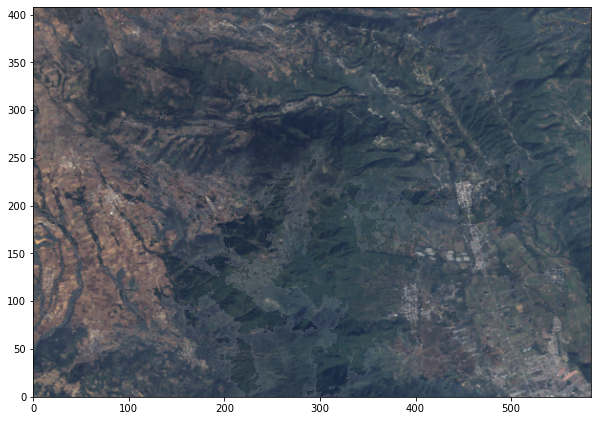

In [297]:
# index = 0
# image_path = [i for i in image_names if muni_ids[index].split("_")[0] in i][0]

plot_attention(image_names, muni_ids, 5, 1, save = False)
# plt.savefig("a_test_fig.png")
# plt.clf()    

In [299]:
for i in range(0, 60):
    plot_attention(image_names, muni_ids, i, 1, save = True)
#     plt.savefig("./figs/" + str(i) + ".png")
#     plt.clf()

/opt/conda/envs/rapids/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/envs/rapids/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  **contour_kws,
/opt/conda/envs/rapids/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/envs/rapids/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  **contour_kws

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>